In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### Import and feature engineer testing set

In [13]:
# import training CSV
fname = './data/train.csv'
# use pandas to read the CSV properly of all different types
data_pd = pd.read_csv(fname)
# convert to a numpy array
data = np.array(data_pd)
# remove categorical data - force cast attempt then remove failures
cols_to_remove = []
for i in range(data.shape[1]):
    try:
        data[:,i] = data[:,i].astype(float)
    except:
        cols_to_remove.append(i)

data = np.delete(data, cols_to_remove, axis=1)
# remove rows with nan values
rows_to_remove = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if math.isnan(data[i,j]):
            rows_to_remove.append(i)
            break

data = np.delete(data, rows_to_remove, axis=0)

# remove outliers with standard deviation TODO()

# take the actual prices and add them to results y
y = data[:, data.shape[1] - 1]
# remove prices column from data
data = np.delete(data, data.shape[1] - 1, 1)
data = data.astype(float)
#data_pd = pd.DataFrame(data)
print("data shape", data.shape)
print("Y shape:", y.shape)

pd.DataFrame(data)

data shape (1121, 37)
Y shape: (1121,)


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1117,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1118,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1119,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


### Import testing set

In [14]:
test = pd.read_csv('./data/test.csv')
test_data = np.array(test)
pd.DataFrame(test)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


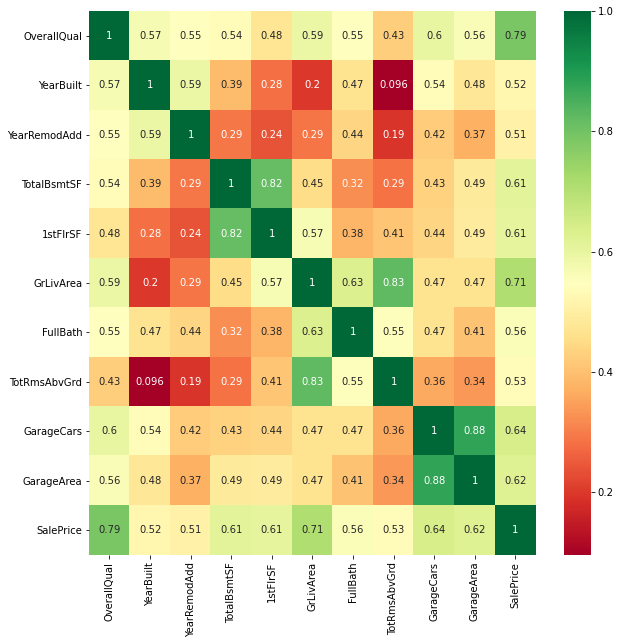

In [16]:
corr = data_pd.corr()
high_corr_features = corr.index[abs(corr["SalePrice"]) > 0.5]
plt.figure(figsize=(10,10))
map = sns.heatmap(data_pd[high_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
# Top 10

corr["SalePrice"].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

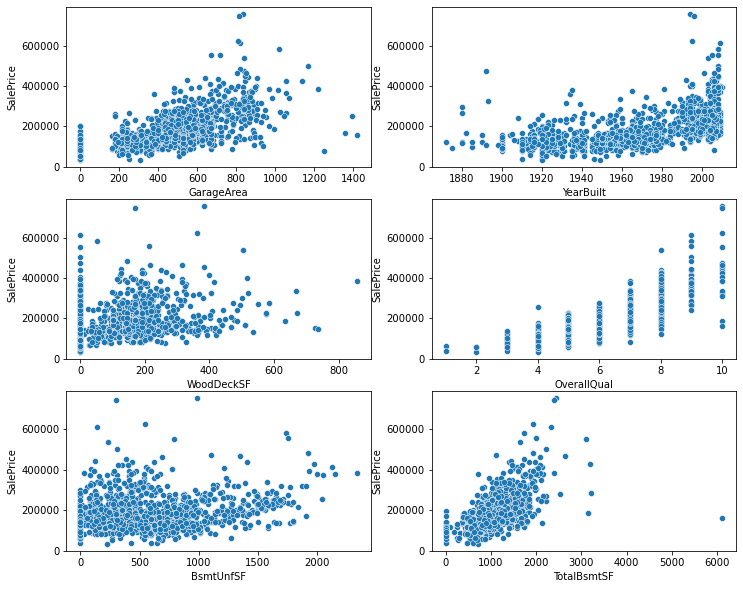

In [18]:
fig = plt.figure(figsize=(12,10))
#GarageArea
plt.subplot(321)
sns.scatterplot(data=data_pd, x='GarageArea', y="SalePrice")
#YearBuilt
plt.subplot(322)
sns.scatterplot(data=data_pd, x='YearBuilt', y="SalePrice")
#WoodDeckSF
plt.subplot(323)
sns.scatterplot(data=data_pd, x='WoodDeckSF', y="SalePrice")
#OverallQual
plt.subplot(324)
sns.scatterplot(data=data_pd, x='OverallQual', y="SalePrice")
#BsmtUnfSF
plt.subplot(325)
sns.scatterplot(data=data_pd, x='BsmtUnfSF', y="SalePrice")
#TotalBsmtSF
plt.subplot(326)
sns.scatterplot(data=data_pd, x='TotalBsmtSF', y="SalePrice")


In [19]:
data = pd.concat([data_pd,test], axis=0)
y_train = data_pd['SalePrice']
data = data.drop(['Id', 'SalePrice'], axis=1)
print(data.shape)

(2919, 79)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [21]:
print('UNIQUE VALUES\n')
for col in data.columns:
    print(f'{col}: {len(data[col].unique())}\n')

UNIQUE VALUES

MSSubClass: 16

MSZoning: 6

LotFrontage: 129

LotArea: 1951

Street: 2

Alley: 3

LotShape: 4

LandContour: 4

Utilities: 3

LotConfig: 5

LandSlope: 3

Neighborhood: 25

Condition1: 9

Condition2: 8

BldgType: 5

HouseStyle: 8

OverallQual: 10

OverallCond: 9

YearBuilt: 118

YearRemodAdd: 61

RoofStyle: 6

RoofMatl: 8

Exterior1st: 16

Exterior2nd: 17

MasVnrType: 5

MasVnrArea: 445

ExterQual: 4

ExterCond: 5

Foundation: 6

BsmtQual: 5

BsmtCond: 5

BsmtExposure: 5

BsmtFinType1: 7

BsmtFinSF1: 992

BsmtFinType2: 7

BsmtFinSF2: 273

BsmtUnfSF: 1136

TotalBsmtSF: 1059

Heating: 6

HeatingQC: 5

CentralAir: 2

Electrical: 6

1stFlrSF: 1083

2ndFlrSF: 635

LowQualFinSF: 36

GrLivArea: 1292

BsmtFullBath: 5

BsmtHalfBath: 4

FullBath: 5

HalfBath: 3

BedroomAbvGr: 8

KitchenAbvGr: 4

KitchenQual: 5

TotRmsAbvGrd: 14

Functional: 8

Fireplaces: 5

FireplaceQu: 6

GarageType: 7

GarageYrBlt: 104

GarageFinish: 4

GarageCars: 7

GarageArea: 604

GarageQual: 6

GarageCond: 

In [22]:
data[data.select_dtypes(exclude='object').columns].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


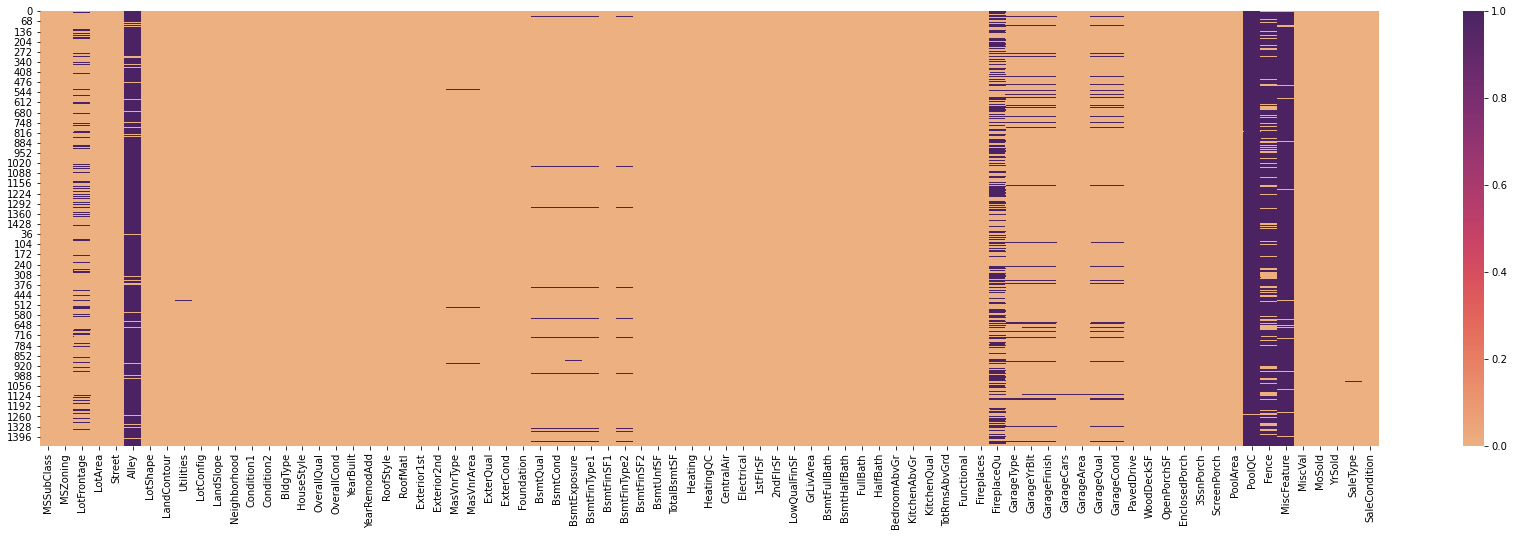

In [23]:
#Visualizing the null values in all columns
plt.figure(figsize=(30,8));
sns.heatmap(data.isnull(), cmap='flare');

In [24]:
#Columns containing most null values
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))


              Total    Percent
PoolQC         2909  99.657417
MiscFeature    2814  96.402878
Alley          2721  93.216855
Fence          2348  80.438506
FireplaceQu    1420  48.646797
LotFrontage     486  16.649538
GarageYrBlt     159   5.447071
GarageFinish    159   5.447071
GarageQual      159   5.447071
GarageCond      159   5.447071


In [25]:
#Dropping columns with > 5 null values
data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
#Sorting columns w.r.t null values
total = data.isnull().sum().sort_values(ascending=False)
total.head(20)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
BsmtFinSF2      1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
BsmtUnfSF       1
Exterior1st     1
TotalBsmtSF     1
Electrical      1
SaleType        1
KitchenQual     1
HalfBath        0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

In [26]:
#Filling the numeric data
numeric_missed = ['BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'BsmtFullBath',
'BsmtHalfBath',
'GarageArea',
'GarageCars']
for feature in numeric_missed:
    data[feature] = data[feature].fillna(0)
#Filling the categorical data
categorical_missed = ['Exterior1st',
'Exterior2nd',
'SaleType',
'MSZoning',
'Electrical',
'KitchenQual',
'Functional']
for feature in categorical_missed:
    data[feature] = data[feature].fillna(data[feature].mode()[0])
#Deleting 'Utilities' column
data.drop(['Utilities'], axis=1, inplace=True)


In [27]:
#Checking for any remaining null values
data.isnull().sum().max()

0

In [28]:
#Top skewed columns
numeric_features = data.dtypes[data.dtypes != 'object'].index
skewed_features = data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]
print(high_skew)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64


In [29]:
#Transforming skewed columns
for feature in high_skew.index:
    data[feature] = np.log1p(data[feature])

In [30]:
#Converting categorical data to numerical
data = pd.get_dummies(data)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,7.589336,1976,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,7.601902,2002,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,7.557995,1970,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,7.601402,2000,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [31]:
#Dividing data back into train & test
train =data[:len(y_train)]
test = data[len(y_train):]
#Printing thier shapes
print(train.shape, test.shape)

(1460, 218) (1459, 218)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(train, y_train, test_size=0.2, random_state=42)

In [33]:
clf = RandomForestRegressor(n_estimators=300)


In [34]:
clf.fit(x_train, y_train)


RandomForestRegressor(n_estimators=300)

In [35]:
clf.score(x_test,y_test)


0.8965577907539533

In [38]:
#Making an prediction
prediction = clf.predict(test)
print(prediction)

[128444.61       155862.06666667 178715.97       ... 161605.41
 118808.66666667 226044.03333333]
